## Step 1: Import libraries

In [1]:
import matplotlib.pyplot as plt
import json
import yaml
import numpy as np

## Step 2: Plotting Electricity

In [52]:
HISTORY_DIR = f'model_history'
DATASET = "electricity"
MATRIX_MISSING_LENGTH = "20x10"
LOCATION = "central"

normal_losses_rmses_dict = {}

avg_losses_rmses_dict_2 = {}
weigh_losses_rmses_dict_20 = {}

avg_losses_rmses_dict_30 = {}
weigh_losses_rmses_dict_30 = {}

avg_losses_rmses_dict_40 = {}
weigh_losses_rmses_dict_40 = {}

avg_losses_rmses_dict_50 = {}
weigh_losses_rmses_dict_50 = {}

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as avg_file_10:
    avg_losses_rmses_dict_10 = json.load(avg_file_10)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as weigh_file_10:
    weigh_losses_rmses_dict_10 = json.load(weigh_file_10)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as avg_file_20:
    avg_losses_rmses_dict_20 = json.load(avg_file_20)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as weigh_file_20:
    weigh_losses_rmses_dict_20 = json.load(weigh_file_20)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as avg_file_30:
    avg_losses_rmses_dict_30 = json.load(avg_file_30)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as weigh_file_30:
    weigh_losses_rmses_dict_30 = json.load(weigh_file_30)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/04/4adjacency/losses_rmses.json") as avg_file_40:
    avg_losses_rmses_dict_40 = json.load(avg_file_40)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/04/4adjacency/losses_rmses.json") as weigh_file_40:
    weigh_losses_rmses_dict_40 = json.load(weigh_file_40)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as avg_file_50:
    avg_losses_rmses_dict_50 = json.load(avg_file_50)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as weigh_file_50:
    weigh_losses_rmses_dict_50 = json.load(weigh_file_50)

## Plot Central Refit

[0.28669705986976624, 0.2733808159828186, 0.2679033875465393, 0.26419246196746826, 0.26103365421295166, 0.2584121525287628]


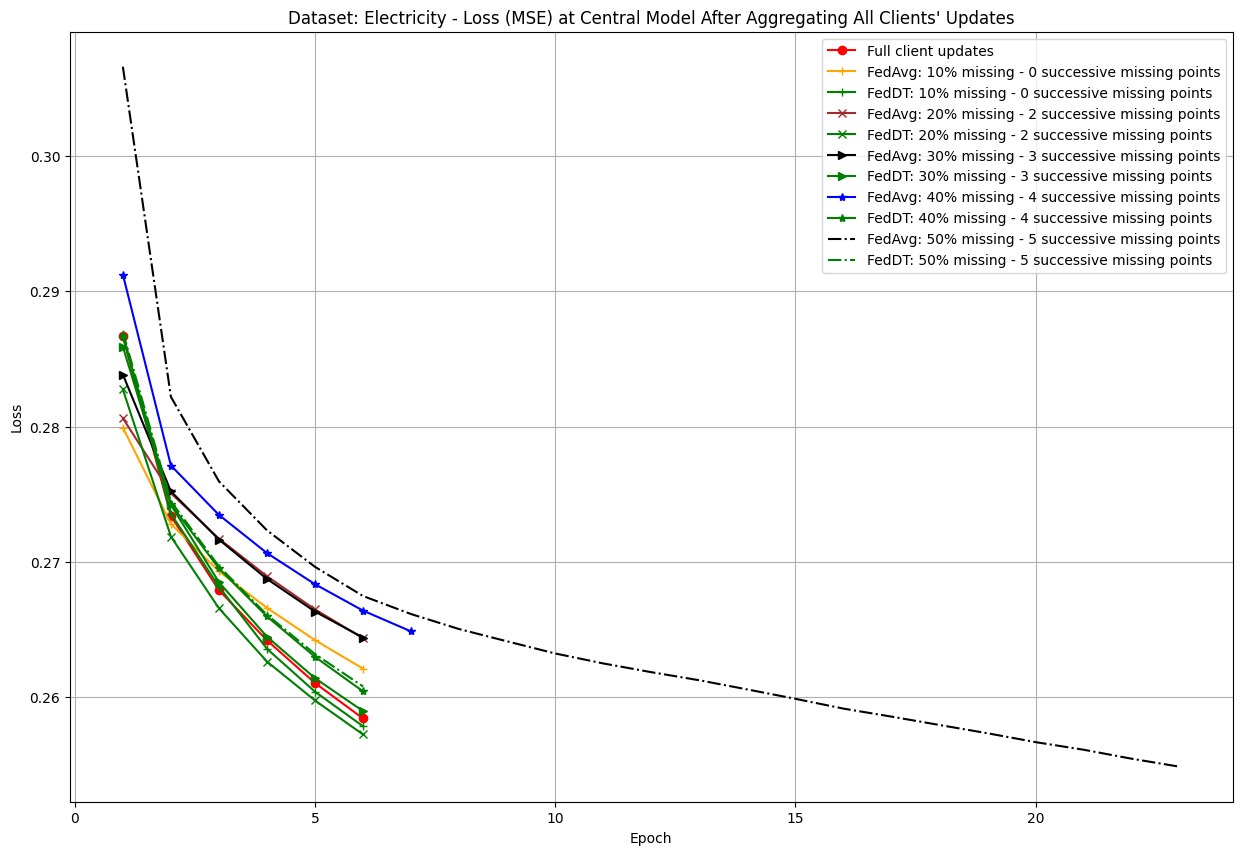

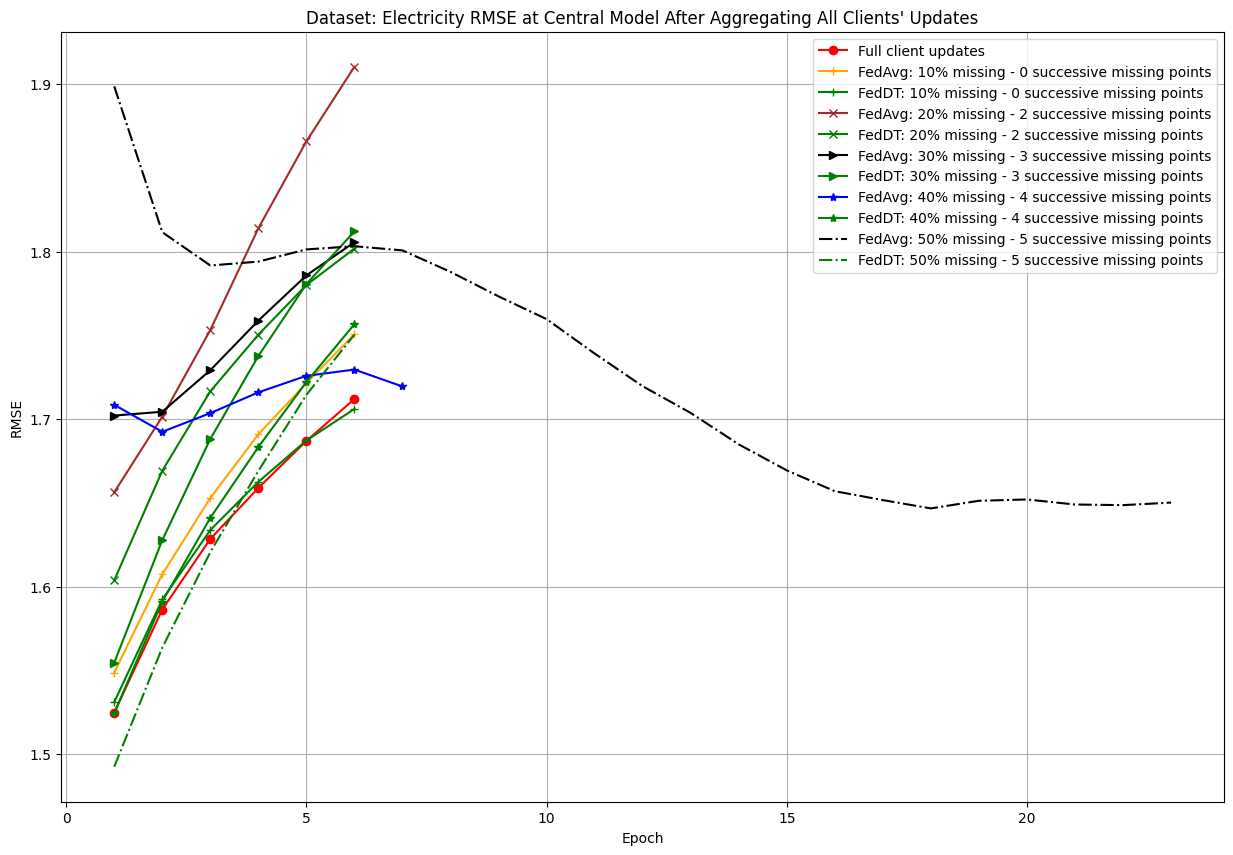

In [55]:
category = "refit"
loss_mode_display = "losses"
rmse_mode_display = "val_losses"

print(normal_losses_rmses_dict[category][loss_mode_display])

plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[category][loss_mode_display]) + 1), normal_losses_rmses_dict[category][loss_mode_display], '-o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[category][loss_mode_display]) + 1), avg_losses_rmses_dict_10[category][loss_mode_display], '-+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[category][loss_mode_display]) + 1), weigh_losses_rmses_dict_10[category][loss_mode_display], '-+', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[category][loss_mode_display]) + 1), avg_losses_rmses_dict_20[category][loss_mode_display], '-x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[category][loss_mode_display]) + 1), weigh_losses_rmses_dict_20[category][loss_mode_display], '-x', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[category][loss_mode_display]) + 1), avg_losses_rmses_dict_30[category][loss_mode_display], '->', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[category][loss_mode_display]) + 1), weigh_losses_rmses_dict_30[category][loss_mode_display], '->', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_40[category][loss_mode_display]) + 1), avg_losses_rmses_dict_40[category][loss_mode_display], '-*', color='blue', label='FedAvg: 40% missing - 4 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_40[category][loss_mode_display]) + 1), weigh_losses_rmses_dict_40[category][loss_mode_display], '-*', color='green', label='FedDT: 40% missing - 4 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[category][loss_mode_display]) + 1), avg_losses_rmses_dict_50[category][loss_mode_display], '-.', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[category][loss_mode_display]) + 1), weigh_losses_rmses_dict_50[category][loss_mode_display], '-.', color='green', label='FedDT: 50% missing - 5 successive missing points')

plt.title("Dataset: Electricity - Loss (MSE) at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[category][rmse_mode_display]) + 1), normal_losses_rmses_dict[category][rmse_mode_display], '-o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[category][rmse_mode_display]) + 1), avg_losses_rmses_dict_10[category][rmse_mode_display], '-+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[category][rmse_mode_display]) + 1), weigh_losses_rmses_dict_10[category][rmse_mode_display], '-+', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[category][rmse_mode_display]) + 1), avg_losses_rmses_dict_20[category][rmse_mode_display], '-x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[category][rmse_mode_display]) + 1), weigh_losses_rmses_dict_20[category][rmse_mode_display], '-x', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[category][rmse_mode_display]) + 1), avg_losses_rmses_dict_30[category][rmse_mode_display], '->', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[category][rmse_mode_display]) + 1), weigh_losses_rmses_dict_30[category][rmse_mode_display], '->', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_40[category][rmse_mode_display]) + 1), avg_losses_rmses_dict_40[category][rmse_mode_display], '-*', color='blue', label='FedAvg: 40% missing - 4 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_40[category][rmse_mode_display]) + 1), weigh_losses_rmses_dict_40[category][rmse_mode_display], '-*', color='green', label='FedDT: 40% missing - 4 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[category][rmse_mode_display]) + 1), avg_losses_rmses_dict_50[category][rmse_mode_display], '-.', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[category][rmse_mode_display]) + 1), weigh_losses_rmses_dict_50[category][rmse_mode_display], '-.', color='green', label='FedDT: 50% missing - 5 successive missing points')

plt.title("Dataset: Electricity RMSE at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Plot Central Model Predictions Round by Round

[1.5639065324606036, 1.1735501333091887, 1.1880795921546299, 1.1980824010337303, 1.2004696662022496, 1.2011223511449798, 1.200375573671858, 1.1985342949045374, 1.1987476231110907, 1.1977132486315625, 1.1966870451673446, 1.1978657697839286, 1.1988202156608947, 1.1997426035121062, 1.1996698183553736, 1.1993950829109183, 1.1993561706337157, 1.1990545203863279, 1.1985531926420063, 1.1969055331247365]


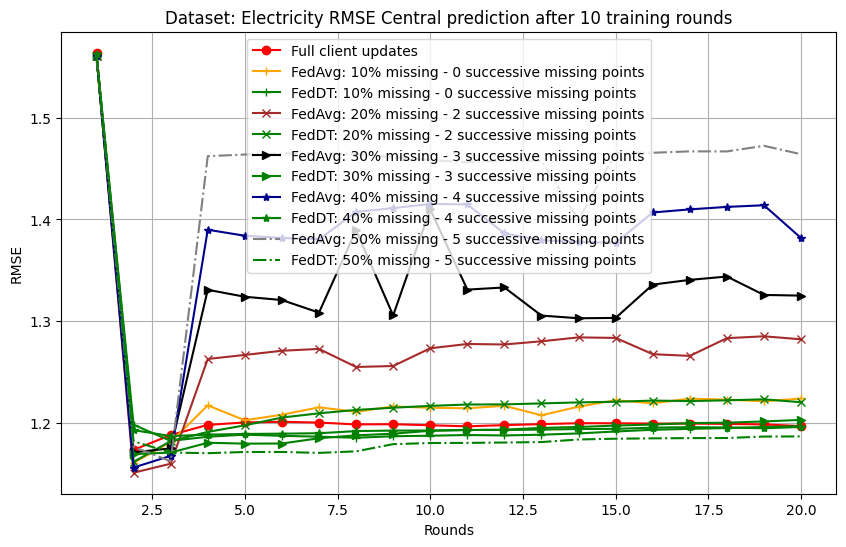

In [59]:
category = "central_round_predictions"
print(normal_losses_rmses_dict[category])
print
# print(weigh_losses_rmses_dict_10[category])
# normal_central_prediction_losses = [x[1]**(1/2) for x in normal_losses_rmses_dict[category]]
# avg_central_prediction_losses_10 = [x[1]**(1/2) for x in avg_losses_rmses_dict_10[category]]
# avg_central_prediction_losses_20 = [x[1]**(1/2) for x in avg_losses_rmses_dict_20[category]]
# avg_central_prediction_losses_30 = [x[1]**(1/2) for x in avg_losses_rmses_dict_30[category]]
# avg_central_prediction_losses_40 = [x[1]**(1/2) for x in avg_losses_rmses_dict_40[category]]
# avg_central_prediction_losses_50 = [x[1]**(1/2) for x in avg_losses_rmses_dict_50[category]]
# weight_central_prediction_losses_10 = [x[1]**(1/2) for x in weigh_losses_rmses_dict_10[category]]
# weight_central_prediction_losses_20 = [x[1]**(1/2) for x in weigh_losses_rmses_dict_20[category]]
# weight_central_prediction_losses_30 = [x[1]**(1/2) for x in weigh_losses_rmses_dict_30[category]]
# weight_central_prediction_losses_40 = [x[1]**(1/2) for x in weigh_losses_rmses_dict_40[category]]
# weight_central_prediction_losses_50 = [x[1]**(1/2) for x in weigh_losses_rmses_dict_50[category]]

normal_central_prediction_losses = normal_losses_rmses_dict[category]
avg_central_prediction_losses_10 = avg_losses_rmses_dict_10[category]
avg_central_prediction_losses_20 = avg_losses_rmses_dict_20[category]
avg_central_prediction_losses_30 = avg_losses_rmses_dict_30[category]
avg_central_prediction_losses_40 = avg_losses_rmses_dict_40[category]
avg_central_prediction_losses_50 = avg_losses_rmses_dict_50[category]
weight_central_prediction_losses_10 = weigh_losses_rmses_dict_10[category]
weight_central_prediction_losses_20 = weigh_losses_rmses_dict_20[category]
weight_central_prediction_losses_30 = weigh_losses_rmses_dict_30[category]
weight_central_prediction_losses_40 = weigh_losses_rmses_dict_40[category]
weight_central_prediction_losses_50 = weigh_losses_rmses_dict_50[category]

plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_central_prediction_losses) + 1), normal_central_prediction_losses, '-o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_central_prediction_losses_10) + 1), avg_central_prediction_losses_10, '+-', color='orange', label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weight_central_prediction_losses_10) + 1), weight_central_prediction_losses_10, '+-', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_central_prediction_losses_20) + 1), avg_central_prediction_losses_20, 'x-', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weight_central_prediction_losses_20) + 1), weight_central_prediction_losses_20, 'x-', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_central_prediction_losses_30) + 1), avg_central_prediction_losses_30, '>-', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weight_central_prediction_losses_30) + 1), weight_central_prediction_losses_30, '>-', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_central_prediction_losses_40) + 1), avg_central_prediction_losses_40, '*-', color='darkblue', label='FedAvg: 40% missing - 4 successive missing points')
plt.plot(range(1, len(weight_central_prediction_losses_40) + 1), weight_central_prediction_losses_40, '*-', color='green', label='FedDT: 40% missing - 4 successive missing points')

plt.plot(range(1, len(avg_central_prediction_losses_50) + 1), avg_central_prediction_losses_50, '-.', color='grey', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weight_central_prediction_losses_50) + 1), weight_central_prediction_losses_50, '-.', color='green', label='FedDT: 50% missing - 5 successive missing points')

plt.title("Dataset: Electricity RMSE Central prediction after 10 training rounds")
plt.xlabel("Rounds")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Plot Central Model Prediction for Client test data

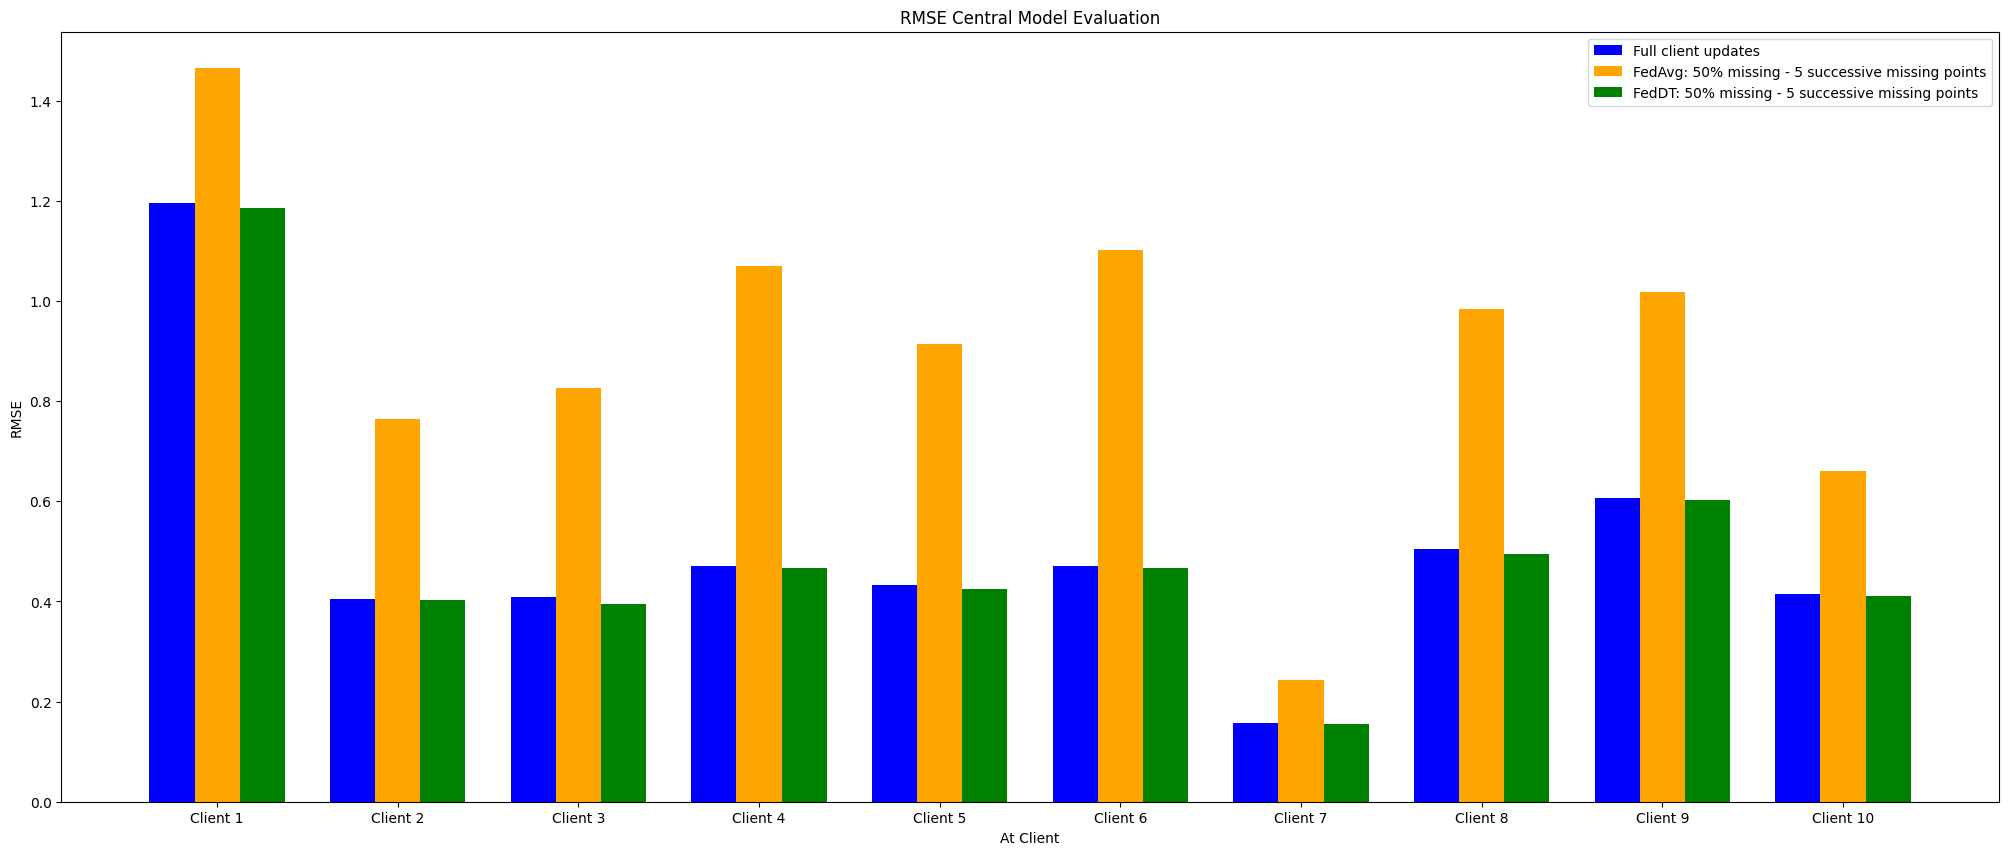

In [58]:
category = "client_predictions"
rmse_mode_display = "rmses"

plt.figure(figsize=(25, 10))

normal_rmse_arr = normal_losses_rmses_dict[category][rmse_mode_display]

avg_rmse_arr_10 = avg_losses_rmses_dict_10[category][rmse_mode_display]
weight_rmse_arr_10 = weigh_losses_rmses_dict_10[category][rmse_mode_display]

avg_rmse_arr_20 = avg_losses_rmses_dict_20[category][rmse_mode_display]
weight_rmse_arr_20 = weigh_losses_rmses_dict_20[category][rmse_mode_display]

avg_rmse_arr_30 = avg_losses_rmses_dict_30[category][rmse_mode_display]
weight_rmse_arr_30 = weigh_losses_rmses_dict_30[category][rmse_mode_display]

avg_rmse_arr_40 = avg_losses_rmses_dict_40[category][rmse_mode_display]
weight_rmse_arr_40 = weigh_losses_rmses_dict_40[category][rmse_mode_display]

avg_rmse_arr_50 = avg_losses_rmses_dict_50[category][rmse_mode_display]
weight_rmse_arr_50 = weigh_losses_rmses_dict_50[category][rmse_mode_display]

N = 10
ind = np.arange(N)
width = 0.25

bar_normal = plt.bar(ind, normal_rmse_arr, width, color='blue')
# bar_avg_10 = plt.bar(ind + width, avg_rmse_arr_10, width, color='orange')
# bar_weight_10 = plt.bar(ind + width*2, weight_rmse_arr_10, width, color='green')

# bar_avg_20 = plt.bar(ind + width, avg_rmse_arr_20, width, color='orange')
# bar_weight_20 = plt.bar(ind + width*2, weight_rmse_arr_20, width, color='green')

# bar_avg_30 = plt.bar(ind + width, avg_rmse_arr_30, width, color='orange')
# bar_weight_30 = plt.bar(ind + width*2, weight_rmse_arr_30, width, color='green')

# bar_avg_40 = plt.bar(ind + width, avg_rmse_arr_40, width, color='orange')
# bar_weight_40 = plt.bar(ind + width*2, weight_rmse_arr_40, width, color='green')

bar_avg_50 = plt.bar(ind + width, avg_rmse_arr_50, width, color='orange')
bar_weight_50 = plt.bar(ind + width*2, weight_rmse_arr_50, width, color='green')

plt.xlabel("At Client")
plt.ylabel("RMSE")
plt.title("RMSE Central Model Evaluation")

plt.xticks(ind + width, [f"Client {x}" for x in range(1, N + 1)])
plt.legend(
    (
        bar_normal, 
        # bar_avg_10, bar_weight_10,
        # bar_avg_20, bar_weight_20,
        # bar_avg_30, bar_weight_30,
        # bar_avg_40, bar_weight_40,
        bar_avg_50, bar_weight_50
    ),
    (
        "Full client updates",
        # "FedAvg: 10% missing - 0 successive missing points", "FedDT: 10% missing - 0 successive missing points",
        # "FedAvg: 20% missing - 2 successive missing points", "FedDT: 20% missing - 2 successive missing points",
        # "FedAvg: 30% missing - 3 successive missing points", "FedDT: 30% missing - 3 successive missing points",
        # "FedAvg: 40% missing - 4 successive missing points", "FedDT: 40% missing - 4 successive missing points"
        "FedAvg: 50% missing - 5 successive missing points", "FedDT: 50% missing - 5 successive missing points"
    )
)

plt.show()

## Step 3: Plotting Weather

In [ ]:
HISTORY_DIR = f'model_history'
DATASET = "weather"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

loss_mode_display = "val_losses"
rmse_mode_display = "maes"

normal_losses_rmses_dict = {}

avg_losses_rmses_dict_2 = {}
weigh_losses_rmses_dict_20 = {}

avg_losses_rmses_dict_30 = {}
weigh_losses_rmses_dict_30 = {}

avg_losses_rmses_dict_40 = {}
weigh_losses_rmses_dict_40 = {}

avg_losses_rmses_dict_50 = {}
weigh_losses_rmses_dict_50 = {}

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as avg_file_10:
    avg_losses_rmses_dict_10 = json.load(avg_file_10)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as weigh_file_10:
    weigh_losses_rmses_dict_10 = json.load(weigh_file_10)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as avg_file_20:
    avg_losses_rmses_dict_20 = json.load(avg_file_20)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as weigh_file_20:
    weigh_losses_rmses_dict_20 = json.load(weigh_file_20)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as avg_file_30:
    avg_losses_rmses_dict_30 = json.load(avg_file_30)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as weigh_file_30:
    weigh_losses_rmses_dict_30 = json.load(weigh_file_30)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/04/4adjacency/losses_rmses.json") as avg_file_40:
    avg_losses_rmses_dict_40 = json.load(avg_file_40)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/04/4adjacency/losses_rmses.json") as weigh_file_40:
    weigh_losses_rmses_dict_40 = json.load(weigh_file_40)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as avg_file_50:
    avg_losses_rmses_dict_50 = json.load(avg_file_50)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as weigh_file_50:
    weigh_losses_rmses_dict_50 = json.load(weigh_file_50)

# plt.figure(figsize=(15, 10))
# plt.plot(range(1, len(normal_losses_rmses_dict[loss_mode_display]) + 1), normal_losses_rmses_dict[loss_mode_display], 'o', color='red', label='Full client updates')

# plt.plot(range(1, len(avg_losses_rmses_dict_10[loss_mode_display]) + 1), avg_losses_rmses_dict_10[loss_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
# plt.plot(range(1, len(weigh_losses_rmses_dict_10[loss_mode_display]) + 1), weigh_losses_rmses_dict_10['losses'], '+', color='green', label='FedDT: 10% missing - 0 successive missing points')

# plt.plot(range(1, len(avg_losses_rmses_dict_20[loss_mode_display]) + 1), avg_losses_rmses_dict_20[loss_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
# plt.plot(range(1, len(weigh_losses_rmses_dict_20[loss_mode_display]) + 1), weigh_losses_rmses_dict_20[loss_mode_display], 'x', color='green', label='FedDT Train: 20% missing - 2 successive missing points')

# plt.plot(range(1, len(avg_losses_rmses_dict_30[loss_mode_display]) + 1), avg_losses_rmses_dict_30[loss_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
# plt.plot(range(1, len(weigh_losses_rmses_dict_30[loss_mode_display]) + 1), weigh_losses_rmses_dict_30[loss_mode_display], '>', color='green', label='FedDT: 30% missing - 3 successive missing points')

# plt.plot(range(1, len(avg_losses_rmses_dict_40[loss_mode_display]) + 1), avg_losses_rmses_dict_40[loss_mode_display], '*', color='darkblue', label='FedAvg: 40% missing - 4 successive missing points')
# plt.plot(range(1, len(weigh_losses_rmses_dict_40[loss_mode_display]) + 1), weigh_losses_rmses_dict_40[loss_mode_display], '*', color='green', label='FedDT: 40% missing - 4 successive missing points')

# plt.plot(range(1, len(avg_losses_rmses_dict_50[loss_mode_display]) + 1), avg_losses_rmses_dict_50[loss_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
# plt.plot(range(1, len(weigh_losses_rmses_dict_50[loss_mode_display]) + 1), weigh_losses_rmses_dict_50[loss_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


# plt.title("Dataset: Weather - Loss (MSE) at Central Model After Aggregating All Clients' Updates")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[rmse_mode_display]) + 1), normal_losses_rmses_dict[rmse_mode_display], 'o-', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[rmse_mode_display]) + 1), avg_losses_rmses_dict_10[rmse_mode_display], '+-', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
# plt.plot(range(1, len(weigh_losses_rmses_dict_10[rmse_mode_display]) + 1), weigh_losses_rmses_dict_10[rmse_mode_display], '+-', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[rmse_mode_display]) + 1), avg_losses_rmses_dict_20[rmse_mode_display], 'x-', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
# plt.plot(range(1, len(weigh_losses_rmses_dict_20[rmse_mode_display]) + 1), weigh_losses_rmses_dict_20[rmse_mode_display], 'x-', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[rmse_mode_display]) + 1), avg_losses_rmses_dict_30[rmse_mode_display], '>-', color='black', label='FedAvg: 30% missing - 3 successive missing points')
# plt.plot(range(1, len(weigh_losses_rmses_dict_30[rmse_mode_display]) + 1), weigh_losses_rmses_dict_30[rmse_mode_display], '>-', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_40[rmse_mode_display]) + 1), avg_losses_rmses_dict_40[rmse_mode_display], '*-', color='darkblue', label='FedAvg: 40% missing - 4 successive missing points')
# plt.plot(range(1, len(weigh_losses_rmses_dict_40[rmse_mode_display]) + 1), weigh_losses_rmses_dict_40[rmse_mode_display], '*-', color='green', label='FedDT: 40% missing - 4 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[rmse_mode_display]) + 1), avg_losses_rmses_dict_50[rmse_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[rmse_mode_display]) + 1), weigh_losses_rmses_dict_50[rmse_mode_display], '.-', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Weather - RMSE at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Step 4: Traffic dataset

In [ ]:
HISTORY_DIR = f'model_history'
DATASET = "traffic"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

loss_mode_display = "val_losses"
rmse_mode_display = "val_rmses"

normal_losses_rmses_dict = {}

avg_losses_rmses_dict_2 = {}
weigh_losses_rmses_dict_20 = {}

avg_losses_rmses_dict_30 = {}
weigh_losses_rmses_dict_30 = {}

avg_losses_rmses_dict_40 = {}
weigh_losses_rmses_dict_40 = {}

avg_losses_rmses_dict_50 = {}
weigh_losses_rmses_dict_50 = {}

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as avg_file_10:
    avg_losses_rmses_dict_10 = json.load(avg_file_10)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as weigh_file_10:
    weigh_losses_rmses_dict_10 = json.load(weigh_file_10)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as avg_file_20:
    avg_losses_rmses_dict_20 = json.load(avg_file_20)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as weigh_file_20:
    weigh_losses_rmses_dict_20 = json.load(weigh_file_20)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as avg_file_30:
    avg_losses_rmses_dict_30 = json.load(avg_file_30)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as weigh_file_30:
    weigh_losses_rmses_dict_30 = json.load(weigh_file_30)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/04/4adjacency/losses_rmses.json") as avg_file_40:
    avg_losses_rmses_dict_40 = json.load(avg_file_40)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/04/4adjacency/losses_rmses.json") as weigh_file_40:
    weigh_losses_rmses_dict_40 = json.load(weigh_file_40)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as avg_file_50:
    avg_losses_rmses_dict_50 = json.load(avg_file_50)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as weigh_file_50:
    weigh_losses_rmses_dict_50 = json.load(weigh_file_50)

plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[loss_mode_display]) + 1), normal_losses_rmses_dict[loss_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[loss_mode_display]) + 1), avg_losses_rmses_dict_10[loss_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[loss_mode_display]) + 1), weigh_losses_rmses_dict_10['losses'], '+', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[loss_mode_display]) + 1), avg_losses_rmses_dict_20[loss_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[loss_mode_display]) + 1), weigh_losses_rmses_dict_20[loss_mode_display], 'x', color='green', label='FedDT Train: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[loss_mode_display]) + 1), avg_losses_rmses_dict_30[loss_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[loss_mode_display]) + 1), weigh_losses_rmses_dict_30[loss_mode_display], '>', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_40[loss_mode_display]) + 1), avg_losses_rmses_dict_40[loss_mode_display], '*', color='darkblue', label='FedAvg: 40% missing - 4 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_40[loss_mode_display]) + 1), weigh_losses_rmses_dict_40[loss_mode_display], '*', color='green', label='FedDT: 40% missing - 4 successive missing points')

# plt.plot(range(1, len(avg_losses_rmses_dict_50[loss_mode_display]) + 1), avg_losses_rmses_dict_50[loss_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
# plt.plot(range(1, len(weigh_losses_rmses_dict_50[loss_mode_display]) + 1), weigh_losses_rmses_dict_50[loss_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Traffic - Loss (MSE) at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[rmse_mode_display]) + 1), normal_losses_rmses_dict[rmse_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[rmse_mode_display]) + 1), avg_losses_rmses_dict_10[rmse_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[rmse_mode_display]) + 1), weigh_losses_rmses_dict_10[rmse_mode_display], '+', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[rmse_mode_display]) + 1), avg_losses_rmses_dict_20[rmse_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[rmse_mode_display]) + 1), weigh_losses_rmses_dict_20[rmse_mode_display], 'x', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[rmse_mode_display]) + 1), avg_losses_rmses_dict_30[rmse_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[rmse_mode_display]) + 1), weigh_losses_rmses_dict_30[rmse_mode_display], '>', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_40[rmse_mode_display]) + 1), avg_losses_rmses_dict_40[rmse_mode_display], '*', color='darkblue', label='FedAvg: 40% missing - 4 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_40[rmse_mode_display]) + 1), weigh_losses_rmses_dict_40[rmse_mode_display], '*', color='green', label='FedDT: 40% missing - 4 successive missing points')

# plt.plot(range(1, len(avg_losses_rmses_dict_50[rmse_mode_display]) + 1), avg_losses_rmses_dict_50[rmse_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
# plt.plot(range(1, len(weigh_losses_rmses_dict_50[rmse_mode_display]) + 1), weigh_losses_rmses_dict_50[rmse_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Traffic - RMSE at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Step 5: PSM dataset

In [ ]:
HISTORY_DIR = f'model_history'
DATASET = "psm"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

loss_mode_display = "losses"
rmse_mode_display = "rmses"

normal_losses_rmses_dict = {}

avg_losses_rmses_dict_2 = {}
weigh_losses_rmses_dict_20 = {}

avg_losses_rmses_dict_30 = {}
weigh_losses_rmses_dict_30 = {}

avg_losses_rmses_dict_40 = {}
weigh_losses_rmses_dict_40 = {}

avg_losses_rmses_dict_50 = {}
weigh_losses_rmses_dict_50 = {}

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as avg_file_10:
    avg_losses_rmses_dict_10 = json.load(avg_file_10)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as weigh_file_10:
    weigh_losses_rmses_dict_10 = json.load(weigh_file_10)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as avg_file_20:
    avg_losses_rmses_dict_20 = json.load(avg_file_20)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as weigh_file_20:
    weigh_losses_rmses_dict_20 = json.load(weigh_file_20)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as avg_file_30:
    avg_losses_rmses_dict_30 = json.load(avg_file_30)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as weigh_file_30:
    weigh_losses_rmses_dict_30 = json.load(weigh_file_30)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/04/4adjacency/losses_rmses.json") as avg_file_40:
    avg_losses_rmses_dict_40 = json.load(avg_file_40)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/04/4adjacency/losses_rmses.json") as weigh_file_40:
    weigh_losses_rmses_dict_40 = json.load(weigh_file_40)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as avg_file_50:
    avg_losses_rmses_dict_50 = json.load(avg_file_50)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as weigh_file_50:
    weigh_losses_rmses_dict_50 = json.load(weigh_file_50)

plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[loss_mode_display]) + 1), normal_losses_rmses_dict[loss_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[loss_mode_display]) + 1), avg_losses_rmses_dict_10[loss_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[loss_mode_display]) + 1), weigh_losses_rmses_dict_10['losses'], '+', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[loss_mode_display]) + 1), avg_losses_rmses_dict_20[loss_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[loss_mode_display]) + 1), weigh_losses_rmses_dict_20[loss_mode_display], 'x', color='green', label='FedDT Train: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[loss_mode_display]) + 1), avg_losses_rmses_dict_30[loss_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[loss_mode_display]) + 1), weigh_losses_rmses_dict_30[loss_mode_display], '>', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_40[loss_mode_display]) + 1), avg_losses_rmses_dict_40[loss_mode_display], '*', color='darkblue', label='FedAvg: 40% missing - 4 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_40[loss_mode_display]) + 1), weigh_losses_rmses_dict_40[loss_mode_display], '*', color='green', label='FedDT: 40% missing - 4 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[loss_mode_display]) + 1), avg_losses_rmses_dict_50[loss_mode_display], '--', color='grey', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[loss_mode_display]) + 1), weigh_losses_rmses_dict_50[loss_mode_display], '--', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: PSM - Loss (MSE) at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[rmse_mode_display]) + 1), normal_losses_rmses_dict[rmse_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[rmse_mode_display]) + 1), avg_losses_rmses_dict_10[rmse_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[rmse_mode_display]) + 1), weigh_losses_rmses_dict_10[rmse_mode_display], '+', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[rmse_mode_display]) + 1), avg_losses_rmses_dict_20[rmse_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[rmse_mode_display]) + 1), weigh_losses_rmses_dict_20[rmse_mode_display], 'x', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[rmse_mode_display]) + 1), avg_losses_rmses_dict_30[rmse_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[rmse_mode_display]) + 1), weigh_losses_rmses_dict_30[rmse_mode_display], '>', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_40[rmse_mode_display]) + 1), avg_losses_rmses_dict_40[rmse_mode_display], '*', color='darkblue', label='FedAvg: 40% missing - 4 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_40[rmse_mode_display]) + 1), weigh_losses_rmses_dict_40[rmse_mode_display], '*', color='green', label='FedDT: 40% missing - 4 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[rmse_mode_display]) + 1), avg_losses_rmses_dict_50[rmse_mode_display], '--', color='grey', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[rmse_mode_display]) + 1), weigh_losses_rmses_dict_50[rmse_mode_display], '--', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: PSM - RMSE at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Step 6: Solar Power Dataset

In [ ]:
HISTORY_DIR = f'model_history'
DATASET = "solarpower"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

loss_mode_display = "val_losses"
rmse_mode_display = "val_rmses"

normal_losses_rmses_dict = {}

avg_losses_rmses_dict_2 = {}
weigh_losses_rmses_dict_20 = {}

avg_losses_rmses_dict_30 = {}
weigh_losses_rmses_dict_30 = {}

avg_losses_rmses_dict_40 = {}
weigh_losses_rmses_dict_40 = {}

avg_losses_rmses_dict_50 = {}
weigh_losses_rmses_dict_50 = {}

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as avg_file_10:
    avg_losses_rmses_dict_10 = json.load(avg_file_10)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as weigh_file_10:
    weigh_losses_rmses_dict_10 = json.load(weigh_file_10)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as avg_file_20:
    avg_losses_rmses_dict_20 = json.load(avg_file_20)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as weigh_file_20:
    weigh_losses_rmses_dict_20 = json.load(weigh_file_20)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as avg_file_30:
    avg_losses_rmses_dict_30 = json.load(avg_file_30)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as weigh_file_30:
    weigh_losses_rmses_dict_30 = json.load(weigh_file_30)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/04/4adjacency/losses_rmses.json") as avg_file_40:
    avg_losses_rmses_dict_40 = json.load(avg_file_40)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/04/4adjacency/losses_rmses.json") as weigh_file_40:
    weigh_losses_rmses_dict_40 = json.load(weigh_file_40)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as avg_file_50:
    avg_losses_rmses_dict_50 = json.load(avg_file_50)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as weigh_file_50:
    weigh_losses_rmses_dict_50 = json.load(weigh_file_50)

plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[loss_mode_display]) + 1), normal_losses_rmses_dict[loss_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[loss_mode_display]) + 1), avg_losses_rmses_dict_10[loss_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[loss_mode_display]) + 1), weigh_losses_rmses_dict_10['losses'], '+', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[loss_mode_display]) + 1), avg_losses_rmses_dict_20[loss_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[loss_mode_display]) + 1), weigh_losses_rmses_dict_20[loss_mode_display], 'x', color='green', label='FedDT Train: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[loss_mode_display]) + 1), avg_losses_rmses_dict_30[loss_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[loss_mode_display]) + 1), weigh_losses_rmses_dict_30[loss_mode_display], '>', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_40[loss_mode_display]) + 1), avg_losses_rmses_dict_40[loss_mode_display], '*', color='darkblue', label='FedAvg: 40% missing - 4 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_40[loss_mode_display]) + 1), weigh_losses_rmses_dict_40[loss_mode_display], '*', color='green', label='FedDT: 40% missing - 4 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[loss_mode_display]) + 1), avg_losses_rmses_dict_50[loss_mode_display], '--', color='grey', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[loss_mode_display]) + 1), weigh_losses_rmses_dict_50[loss_mode_display], '--', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Solar Power - Loss (MSE) at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[rmse_mode_display]) + 1), normal_losses_rmses_dict[rmse_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[rmse_mode_display]) + 1), avg_losses_rmses_dict_10[rmse_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[rmse_mode_display]) + 1), weigh_losses_rmses_dict_10[rmse_mode_display], '+', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[rmse_mode_display]) + 1), avg_losses_rmses_dict_20[rmse_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[rmse_mode_display]) + 1), weigh_losses_rmses_dict_20[rmse_mode_display], 'x', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[rmse_mode_display]) + 1), avg_losses_rmses_dict_30[rmse_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[rmse_mode_display]) + 1), weigh_losses_rmses_dict_30[rmse_mode_display], '>', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_40[rmse_mode_display]) + 1), avg_losses_rmses_dict_40[rmse_mode_display], '*', color='darkblue', label='FedAvg: 40% missing - 4 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_40[rmse_mode_display]) + 1), weigh_losses_rmses_dict_40[rmse_mode_display], '*', color='green', label='FedDT: 40% missing - 4 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[rmse_mode_display]) + 1), avg_losses_rmses_dict_50[rmse_mode_display], '--', color='grey', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[rmse_mode_display]) + 1), weigh_losses_rmses_dict_50[rmse_mode_display], '--', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Solar Power - RMSE at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Step 7: M4 Quarterly Dataset

In [ ]:
HISTORY_DIR = f'model_history'
DATASET = "m4"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

loss_mode_display = "losses"
rmse_mode_display = "rmses"

normal_losses_rmses_dict = {}

avg_losses_rmses_dict_2 = {}
weigh_losses_rmses_dict_20 = {}

avg_losses_rmses_dict_30 = {}
weigh_losses_rmses_dict_30 = {}

avg_losses_rmses_dict_40 = {}
weigh_losses_rmses_dict_40 = {}

avg_losses_rmses_dict_50 = {}
weigh_losses_rmses_dict_50 = {}

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as avg_file_10:
    avg_losses_rmses_dict_10 = json.load(avg_file_10)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as weigh_file_10:
    weigh_losses_rmses_dict_10 = json.load(weigh_file_10)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as avg_file_20:
    avg_losses_rmses_dict_20 = json.load(avg_file_20)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as weigh_file_20:
    weigh_losses_rmses_dict_20 = json.load(weigh_file_20)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as avg_file_30:
    avg_losses_rmses_dict_30 = json.load(avg_file_30)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as weigh_file_30:
    weigh_losses_rmses_dict_30 = json.load(weigh_file_30)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/04/4adjacency/losses_rmses.json") as avg_file_40:
    avg_losses_rmses_dict_40 = json.load(avg_file_40)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/04/4adjacency/losses_rmses.json") as weigh_file_40:
    weigh_losses_rmses_dict_40 = json.load(weigh_file_40)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as avg_file_50:
    avg_losses_rmses_dict_50 = json.load(avg_file_50)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as weigh_file_50:
    weigh_losses_rmses_dict_50 = json.load(weigh_file_50)

plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[loss_mode_display]) + 1), normal_losses_rmses_dict[loss_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[loss_mode_display]) + 1), avg_losses_rmses_dict_10[loss_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[loss_mode_display]) + 1), weigh_losses_rmses_dict_10['losses'], '+', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[loss_mode_display]) + 1), avg_losses_rmses_dict_20[loss_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[loss_mode_display]) + 1), weigh_losses_rmses_dict_20[loss_mode_display], 'x', color='green', label='FedDT Train: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[loss_mode_display]) + 1), avg_losses_rmses_dict_30[loss_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[loss_mode_display]) + 1), weigh_losses_rmses_dict_30[loss_mode_display], '>', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_40[loss_mode_display]) + 1), avg_losses_rmses_dict_40[loss_mode_display], '*', color='darkblue', label='FedAvg: 40% missing - 4 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_40[loss_mode_display]) + 1), weigh_losses_rmses_dict_40[loss_mode_display], '*', color='green', label='FedDT: 40% missing - 4 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[loss_mode_display]) + 1), avg_losses_rmses_dict_50[loss_mode_display], '--', color='grey', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[loss_mode_display]) + 1), weigh_losses_rmses_dict_50[loss_mode_display], '--', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: M4 Quarterly - Loss (MSE) at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[rmse_mode_display]) + 1), normal_losses_rmses_dict[rmse_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[rmse_mode_display]) + 1), avg_losses_rmses_dict_10[rmse_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[rmse_mode_display]) + 1), weigh_losses_rmses_dict_10[rmse_mode_display], '+', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[rmse_mode_display]) + 1), avg_losses_rmses_dict_20[rmse_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[rmse_mode_display]) + 1), weigh_losses_rmses_dict_20[rmse_mode_display], 'x', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[rmse_mode_display]) + 1), avg_losses_rmses_dict_30[rmse_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[rmse_mode_display]) + 1), weigh_losses_rmses_dict_30[rmse_mode_display], '>', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_40[rmse_mode_display]) + 1), avg_losses_rmses_dict_40[rmse_mode_display], '*', color='darkblue', label='FedAvg: 40% missing - 4 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_40[rmse_mode_display]) + 1), weigh_losses_rmses_dict_40[rmse_mode_display], '*', color='green', label='FedDT: 40% missing - 4 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[rmse_mode_display]) + 1), avg_losses_rmses_dict_50[rmse_mode_display], '--', color='grey', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[rmse_mode_display]) + 1), weigh_losses_rmses_dict_50[rmse_mode_display], '--', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: M4 Quarterly - RMSE at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()
plt.show()

## Step 8: M4 Daily Dataset

In [ ]:
HISTORY_DIR = f'model_history'
DATASET = "train"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

loss_mode_display = "losses"
rmse_mode_display = "rmses"

normal_losses_rmses_dict = {}

avg_losses_rmses_dict_2 = {}
weigh_losses_rmses_dict_20 = {}

avg_losses_rmses_dict_30 = {}
weigh_losses_rmses_dict_30 = {}

avg_losses_rmses_dict_40 = {}
weigh_losses_rmses_dict_40 = {}

avg_losses_rmses_dict_50 = {}
weigh_losses_rmses_dict_50 = {}

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as avg_file_10:
    avg_losses_rmses_dict_10 = json.load(avg_file_10)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as weigh_file_10:
    weigh_losses_rmses_dict_10 = json.load(weigh_file_10)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as avg_file_20:
    avg_losses_rmses_dict_20 = json.load(avg_file_20)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as weigh_file_20:
    weigh_losses_rmses_dict_20 = json.load(weigh_file_20)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as avg_file_30:
    avg_losses_rmses_dict_30 = json.load(avg_file_30)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as weigh_file_30:
    weigh_losses_rmses_dict_30 = json.load(weigh_file_30)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/04/4adjacency/losses_rmses.json") as avg_file_40:
    avg_losses_rmses_dict_40 = json.load(avg_file_40)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/04/4adjacency/losses_rmses.json") as weigh_file_40:
    weigh_losses_rmses_dict_40 = json.load(weigh_file_40)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as avg_file_50:
    avg_losses_rmses_dict_50 = json.load(avg_file_50)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as weigh_file_50:
    weigh_losses_rmses_dict_50 = json.load(weigh_file_50)

plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[loss_mode_display]) + 1), normal_losses_rmses_dict[loss_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[loss_mode_display]) + 1), avg_losses_rmses_dict_10[loss_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[loss_mode_display]) + 1), weigh_losses_rmses_dict_10['losses'], '+', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[loss_mode_display]) + 1), avg_losses_rmses_dict_20[loss_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[loss_mode_display]) + 1), weigh_losses_rmses_dict_20[loss_mode_display], 'x', color='green', label='FedDT Train: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[loss_mode_display]) + 1), avg_losses_rmses_dict_30[loss_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[loss_mode_display]) + 1), weigh_losses_rmses_dict_30[loss_mode_display], '>', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_40[loss_mode_display]) + 1), avg_losses_rmses_dict_40[loss_mode_display], '*', color='darkblue', label='FedAvg: 40% missing - 4 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_40[loss_mode_display]) + 1), weigh_losses_rmses_dict_40[loss_mode_display], '*', color='green', label='FedDT: 40% missing - 4 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[loss_mode_display]) + 1), avg_losses_rmses_dict_50[loss_mode_display], '--', color='grey', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[loss_mode_display]) + 1), weigh_losses_rmses_dict_50[loss_mode_display], '--', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: M4 Daily - Loss (MSE) at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[rmse_mode_display]) + 1), normal_losses_rmses_dict[rmse_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[rmse_mode_display]) + 1), avg_losses_rmses_dict_10[rmse_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[rmse_mode_display]) + 1), weigh_losses_rmses_dict_10[rmse_mode_display], '+', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[rmse_mode_display]) + 1), avg_losses_rmses_dict_20[rmse_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[rmse_mode_display]) + 1), weigh_losses_rmses_dict_20[rmse_mode_display], 'x', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[rmse_mode_display]) + 1), avg_losses_rmses_dict_30[rmse_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[rmse_mode_display]) + 1), weigh_losses_rmses_dict_30[rmse_mode_display], '>', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_40[rmse_mode_display]) + 1), avg_losses_rmses_dict_40[rmse_mode_display], '*', color='darkblue', label='FedAvg: 40% missing - 4 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_40[rmse_mode_display]) + 1), weigh_losses_rmses_dict_40[rmse_mode_display], '*', color='green', label='FedDT: 40% missing - 4 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[rmse_mode_display]) + 1), avg_losses_rmses_dict_50[rmse_mode_display], '--', color='grey', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[rmse_mode_display]) + 1), weigh_losses_rmses_dict_50[rmse_mode_display], '--', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: M4 Daily - RMSE at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()